In [38]:
import pandas as pd
df_ids = pd.read_csv('inflation_ids_fred.csv').set_index('id')
df_ids.head()

,name,Country,Region
id,,,
CPGRLE01ATQ657N,Consumer Price Index: OECD Groups: All Items N...,Austria,Europe
CPGRLE01AUQ657N,Consumer Price Index: OECD Groups: All Items N...,Australia,APAC
CPGRLE01BEQ657N,Consumer Price Index: OECD Groups: All Items N...,Belgium,Europe
CPGRLE01CAQ657N,Consumer Price Index: OECD Groups: All Items N...,Canada,Americas
CPGRLE01CHQ657N,Consumer Price Index: OECD Groups: All Items N...,Switzerland,Europe


In [5]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('"Top 10 Funds by AUM Positioning - Data Gen.ipynb"')))))
from apis.misc.utils import get_fred_series

Python-dotenv could not parse statement starting at line 5


In [34]:
df=pd.DataFrame()
for id in list(df_ids['id']):
    df = pd.concat([df,get_fred_series(id,start_date='20000101',end_date='20230401',frequency='q')],axis=1)

df

,CPGRLE01ATQ657N,CPGRLE01AUQ657N,CPGRLE01BEQ657N,CPGRLE01CAQ657N,CPGRLE01CHQ657N,CPGRLE01CLQ657N,CPGRLE01CZQ657N,CPGRLE01DEQ657N,CPGRLE01DKQ657N,CPGRLE01EEQ657N,...,CPGRLE01MXQ657N,CPGRLE01NLQ657N,CPGRLE01NZQ657N,CPGRLE01PLQ657N,CPGRLE01PTQ657N,CPGRLE01SEQ657N,CPGRLE01SIQ657N,CPGRLE01SKQ657N,CPGRLE01TRQ657N,CPGRLE01USQ657N
2000-01-01,0.507274,0.685770,0.658893,0.104092,0.093359,1.189591,0.771307,0.175845,0.144043,1.251066,...,3.306809,-0.511162,1.911027,1.271776,-0.209737,-0.762141,1.335052,3.999572,13.403366,0.729108
2000-04-01,0.675744,0.560448,0.413887,0.703632,-0.117025,1.275014,0.000000,-0.137622,1.037204,1.010952,...,1.794041,1.105527,0.799571,0.401957,1.620016,0.618769,1.945505,2.043530,8.008255,0.742390
2000-07-01,0.494223,4.181549,0.562856,0.636548,0.062804,0.328610,0.727134,0.409582,-0.020037,0.722825,...,1.472128,0.246096,0.902537,0.542403,0.437745,-0.221182,1.638607,0.688750,8.119938,0.460575
2000-10-01,0.395428,0.186907,0.254744,0.415889,0.296695,0.952827,-0.151976,0.138799,0.825149,1.573282,...,2.157300,0.962086,1.142747,0.371467,1.221610,0.934100,1.779307,0.621623,9.511724,0.605171
2001-01-01,0.827458,0.807286,0.499525,0.221883,0.461943,0.842708,-3.348554,0.405077,0.236772,1.277174,...,1.983280,0.826038,-0.426546,0.572250,0.200436,-0.128218,1.936543,3.665056,8.290505,0.838498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,1.942675,1.669863,1.173662,1.981011,0.927857,2.635808,3.498159,1.706805,2.044220,3.891432,...,1.633080,1.990431,1.316925,0.966667,3.604531,2.485078,3.484094,3.469536,12.952139,1.699407
2022-07-01,1.811934,1.721293,1.748600,1.359761,0.218460,2.516869,3.252859,1.203607,1.305918,3.880423,...,1.596055,1.905512,2.340358,0.933333,0.671727,1.975375,1.699827,2.542228,10.241672,1.507234
2022-10-01,2.239951,1.928516,1.556475,0.679199,0.102680,1.530258,1.722865,1.465134,0.865813,2.233718,...,1.423119,1.366866,2.054920,0.766667,1.891027,2.928528,1.198484,2.226532,8.281189,0.870896
2023-01-01,2.250900,1.157661,2.259032,0.795998,0.671650,2.048799,2.395354,1.262495,1.265195,1.585655,...,1.718010,1.044924,0.881589,1.166667,0.760579,2.506806,1.219123,3.140337,12.329646,1.381603


In [61]:
dfm.to_csv('../../data/Inflation/full_country_inflation_data.csv')

In [36]:
# calculate rate of change
df = df.apply(lambda x: (x / x.iloc[0]) * 100)
df

,CPGRLE01ATQ657N,CPGRLE01AUQ657N,CPGRLE01BEQ657N,CPGRLE01CAQ657N,CPGRLE01CHQ657N,CPGRLE01CLQ657N,CPGRLE01CZQ657N,CPGRLE01DEQ657N,CPGRLE01DKQ657N,CPGRLE01EEQ657N,...,CPGRLE01MXQ657N,CPGRLE01NLQ657N,CPGRLE01NZQ657N,CPGRLE01PLQ657N,CPGRLE01PTQ657N,CPGRLE01SEQ657N,CPGRLE01SIQ657N,CPGRLE01SKQ657N,CPGRLE01TRQ657N,CPGRLE01USQ657N
2000-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2000-04-01,133.210720,81.725457,62.815467,675.971922,-125.348936,107.180868,0.000000,-78.262879,720.067776,80.807230,...,54.252929,-216.277322,41.839840,31.605978,-772.403945,-81.188283,145.725085,51.093722,59.748090,101.821712
2000-07-01,97.427148,609.759984,85.424570,611.525122,67.271720,27.623816,94.272866,232.921662,-13.910495,57.776683,...,44.518074,-48.144557,47.227865,42.649254,-208.711616,29.021201,122.737342,17.220605,60.581334,63.169605
2000-10-01,77.951439,27.255073,38.662505,399.540118,317.798888,80.096984,-19.703647,78.932508,572.850774,125.755276,...,65.238117,-188.215647,59.797511,29.208510,-582.448964,-122.562739,133.276241,15.542233,70.965186,83.001594
2001-01-01,163.118512,117.719660,75.812798,213.160586,494.801079,70.840180,-434.140030,230.360047,164.376529,102.086833,...,59.975634,-161.600166,-22.320250,44.996126,-95.565555,16.823424,145.053779,91.636216,61.853898,115.003225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,382.963409,243.501999,178.126381,1903.136834,993.855836,221.572645,453.536297,970.629315,1419.178089,311.049260,...,49.385362,-389.393748,68.911891,76.009165,-1718.596716,-326.065589,260.970710,86.747683,96.633476,233.080202
2022-07-01,357.190099,251.001657,265.384607,1306.308470,233.999238,211.574325,421.733164,684.469737,906.619394,310.169255,...,48.265713,-372.780780,122.466013,73.388159,-320.271361,-259.187701,127.322898,63.562516,76.411194,206.722990
2022-10-01,441.565966,281.219164,236.225822,652.499614,109.984062,128.637314,223.369431,833.195219,601.081658,178.545126,...,43.036010,-267.403811,107.529623,60.283131,-901.618472,-384.250389,89.770614,55.669250,61.784394,119.446737
2023-01-01,443.724454,168.811876,342.852810,764.707576,719.424184,172.227180,310.557706,717.957873,878.347942,126.744288,...,51.953719,-204.421461,46.131669,91.735199,-362.634859,-328.916436,91.316512,78.516827,91.989170,189.492199


In [53]:
dfm = pd.DataFrame(df.stack())
dfm.index = dfm.index.rename(['date','id'])
dfm = dfm.rename(columns = {0:'cpi'})
dfm

cpi
date       id                         
2000-01-01 CPGRLE01ATQ657N  100.000000
           CPGRLE01AUQ657N  100.000000
           CPGRLE01BEQ657N  100.000000
           CPGRLE01CAQ657N  100.000000
           CPGRLE01CHQ657N  100.000000
...                                ...
2023-04-01 CPGRLE01SEQ657N -399.881046
           CPGRLE01SIQ657N  272.368394
           CPGRLE01SKQ657N   47.987980
           CPGRLE01TRQ657N   69.211544
           CPGRLE01USQ657N  187.436522

[3097 rows x 1 columns]

In [55]:
dfm = dfm.join(df_ids,how='left',on='id')

<Axes: xlabel='date'>

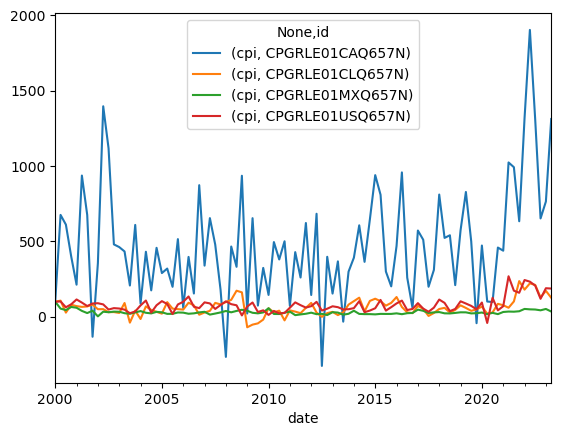

In [58]:
dfm[dfm['Region']=='Americas'].unstack().plot()

<Axes: xlabel='date'>

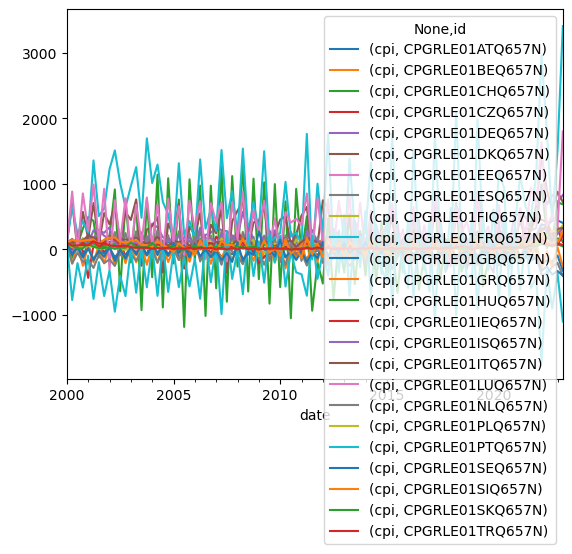

In [59]:
dfm[dfm['Region']=='Europe'].unstack().plot()

<Axes: xlabel='date'>

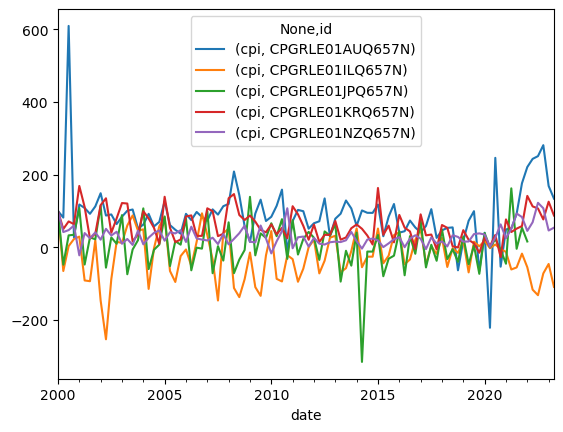

In [60]:
dfm[dfm['Region']=='APAC'].unstack().plot()